In [191]:
def weekanalysis(a,b):
    flatList=[]
    count={}
    mask = df[(df['date'] >=a) & (df['date'] <=b)]
    mask['hashtags']=mask['hashtags'].str.split(" ")
    b=[x for x in mask['hashtags'] if str(x) !='nan']
    for elem in b:
        for item in elem:
            flatList.append(item)
    for a in flatList:
        if a in count:
            count[a]+=1
        else:
            count[a]=1
    max_hashtag=max(count.items(), key=operator.itemgetter(1))[0]
    return max_hashtag
    

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
frame=pd.DataFrame(Weekly_count).T
frame.columns=['Week','Date','#tag']
frame

,Week,Date,#tag
0,0,2020-02-11-2020-02-17,#COVID_19
1,1,2020-02-18-2020-02-24,#Covid_19
2,2,2020-02-25-2020-03-02,#Covid_19
3,3,2020-03-03-2020-03-09,#Covid_19
4,4,2020-03-10-2020-03-16,#Covid_19
5,5,2020-03-17-2020-03-23,#Covid_19
6,6,2020-03-24-2020-03-30,#Covid_19
7,7,2020-03-31-2020-04-06,#Covid_19
8,8,2020-04-07-2020-04-13,#Covid_19
9,9,2020-04-14-2020-04-20,#Covid_19


# Top 20 tweets Weekly Wise

In [194]:
def weekanalysistop3(a,b):
    flatList=[]
    count={}
    top3=[]
    mask = df[(df['date'] >=a) & (df['date'] <=b)]
    mask['hashtags']=mask['hashtags'].str.split(" ")
    b=[x for x in mask['hashtags'] if str(x) !='nan']
    for elem in b:
        for item in elem:
            flatList.append(item)
    for a in flatList:
        if a in count:
            count[a]+=1
        else:
            count[a]=1
    k=Counter(count)
    high=k.most_common(20)
    for i in high: 
        top3.append(i[0])
    return top3
    

In [197]:
import pandas as pd
from collections import Counter
df=pd.read_csv("Sentiment&Cleaned.csv")
df['date']=df['date'].str.split(" ").str[0]
df['hashtags']=df['hashtags'].str.lower()
df=df.sort_values(by='date')
date=[]
topTw=[]
Weekly_count3={}
count=0
unique_dates=df['date'].unique()
for i in range(0, len(unique_dates), 7):  
    date.append(unique_dates[i:i+7])
for j in range(len(date)):
    dates=date[j]
    Weekly_count3[count]=[j,str(dates[0])+'-'+str(dates[-1])]
    topTw.append(weekanalysistop3(dates[0],dates[-1]))
    count=count+1

In [200]:
rank=[]
frame1=pd.DataFrame(Weekly_count3).T
frame1.columns=['Week','Date']
for b in range(len(topTw[0])):
    rank.append(f"Rank: {b}")
df3=pd.DataFrame(topTw,columns=rank)
final=pd.concat([frame1,df3],axis=1)
#f=final.iloc[2:]


In [201]:
final

,Week,Date,Rank: 0,Rank: 1,Rank: 2,Rank: 3,Rank: 4,Rank: 5,Rank: 6,Rank: 7,...,Rank: 10,Rank: 11,Rank: 12,Rank: 13,Rank: 14,Rank: 15,Rank: 16,Rank: 17,Rank: 18,Rank: 19
0,0,2020-02-11-2020-02-17,#covid_19,#coronavirus,#covid19,#covid,#china,#swachhsurvekshan2020surat,#coronavirusoutbreak,#sarscov2,...,#corona,#publichealth,#globalhealth,#covid2019,#singapore,#coronavirusjapan,#wuhan,#who,#wuhancoronavirus,#coronarvirus
1,1,2020-02-18-2020-02-24,#covid_19,#coronavirus,#covid19,#swachhsurvekshan2020surat,#covid,#covid2019,#coronavirusoutbreak,#china,...,#southkorea,#coronavirius,#covid19italia,#korea,#vietnam,#coronavirusitalla,#italy,#shanghai,#diamondprincesscruise,#infographic
2,2,2020-02-25-2020-03-02,#covid_19,#coronavirus,#covid,#covid19,#covid2019,#coronavirusoutbreak,#swachhsurvekshan2020surat,#coronavirusupdates,...,#coronarovirus,#handhygiene,#coronavid19,#pandemic,#china,#corona,#coronavirusupdate,#coronavirius,#covid19italia,#singapore
3,3,2020-03-03-2020-03-09,#covid_19,#coronavirus,#covid,#covid19,#coronavirusoutbreak,#coronaoutbreak,#coronaalert,#coronvirus,...,#corona,#coronavirusupdate,#coronavirusireland,#china,#coronavirusindia,#japan,#coronavirusaustralia,#swachhsurvekshan2020surat,#toiletpapergate,#coronavirusseattle
4,4,2020-03-10-2020-03-16,#covid_19,#coronavirus,#covid,#coronaviruspandemic,#covid19,#coronaoutbreak,#coronavirusupdate,#corona,...,#lockdown,#socialdistancing,#coronavirusoutbreak,#pandemic,#covid2019,#stayhome,#flattenthecurve,#coronavirusupdates,#italy,#panicbuying
5,5,2020-03-17-2020-03-23,#covid_19,#coronavirus,#covid,#stayathome,#covid19,#stayhome,#socialdistancing,#corona,...,#coronavirusupdate,#coronavirusoutbreak,#quarantine,#lockdown,#staysafe,#covid2019,#washyourhands,#indiafightscorona,#pandemic,#staysafestayhome
6,6,2020-03-24-2020-03-30,#covid_19,#stayhome,#coronavirus,#covid19,#covid,#stayathome,#lockdown,#corona,...,#stayathomeandstaysafe,#staysafe,#coronaupdate,#coronalockdown,#indiafightscorona,#covid2019,#washyourhands,#stayhomesavelives,#coronavirusoutbreak,#flattenthecurve
7,7,2020-03-31-2020-04-06,#covid_19,#coronavirus,#covid19,#covid,#stayhome,#stayathome,#covid2019,#coronaviruspandemic,...,#covid19pandemic,#stayhomesavelives,#lockdowneffect,#staysafe,#indiafightscorona,#socialdistancing,#quarantine,#pandemic,#coronavirusoutbreak,#coronavirusupdate
8,8,2020-04-07-2020-04-13,#covid_19,#covid19,#coronavirus,#covid,#worldhealthday,#stayhome,#stayathome,#covid__19,...,#corona,#lockdown,#worldhealthday2020,#pandemic,#socialdistancing,#coronaviruspandemic,#indiafightscorona,#lockdowneffect,#coronavirusoutbreak,#stayhomestaysafe
9,9,2020-04-14-2020-04-20,#covid_19,#covid19,#coronavirus,#covid,#stayhome,#stayathome,#lockdown,#togetherathome,...,#corona,#coronaviruspandemic,#staysafe,#socialdistancing,#quarantine,#indiafightscorona,#trump,#quarantinelife,#cdnpoli,#coronavirusoutbreak


In [15]:
final.to_csv("weekanalysis.csv")

# #tags Frequency

In [11]:
import pandas as pd
listflat=[]
df=pd.read_csv("Sentiment&Cleaned.csv")
df['date']=df['date'].str.split(" ").str[0]
df=df.sort_values(by='date')
df1=df
df1['hashtags']=df1['hashtags'].str.lower()
df1['hashtags']=df1['hashtags'].str.split(" ")
b=[x for x in df1['hashtags'] if str(x) !='nan']
for elem in b:
        for item in elem:
            listflat.append(item)

In [12]:
alltags={}
for a in listflat:
        if a in alltags:
            alltags[a]+=1
        else:
            alltags[a]=1
sorted_x = sorted(alltags.items(), key=operator.itemgetter(1),reverse=True)
sorted_x

[('#covid_19', 109393),
 ('#covid19', 43311),
 ('#coronavirus', 39577),
 ('#covid', 32688),
 ('#stayhome', 17904),
 ('#stayathome', 9706),
 ('#covid__19', 6302),
 ('#lockdown', 5950),
 ('#covid2019', 4926),
 ('#corona', 4541),
 ('#coronaviruspandemic', 4465),
 ('#staysafe', 3935),
 ('#socialdistancing', 3789),
 ('#worldhealthday', 3677),
 ('#pandemic', 3544),
 ('#quarantine', 2964),
 ('#stayhomesavelives', 2848),
 ('#indiafightscorona', 2513),
 ('#coronavirusoutbreak', 2420),
 ('#coronavirusupdate', 2413),
 ('#cdnpoli', 1959),
 ('#covid19pandemic', 1933),
 ('#flattenthecurve', 1842),
 ('#stayhomestaysafe', 1767),
 ('#news', 1711),
 ('#lockdowneffect', 1670),
 ('#washyourhands', 1660),
 ('#trump', 1652),
 ('#quarantinelife', 1650),
 ('#health', 1595),
 ('#china', 1562),
 ('#mentalhealth', 1548),
 ('#breaking', 1442),
 ('#togetherathome', 1427),
 ('#healthcare', 1360),
 ('#lockdownsa', 1309),
 ('#business', 1292),
 ('#india', 1190),
 ('#coronavirususa', 1166),
 ('#canada', 1137),
 ('#cov

In [220]:
# final=pd.concat([frame1,df3],axis=1).T

In [221]:
#f=pd.DataFrame(columns=final['Week'])
#final=pd.DataFrame(columns=['Week0','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9'])
# final.columns=['Week0','Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9']

In [222]:

# final=final.iloc[2:]

# Weekly Wise Sentiment Analysis

In [186]:
import pandas as pd
import operator
df=pd.read_csv("Final.csv")
df['date']=df['date'].str.split(" ").str[0]
df=df.sort_values(by='date')
date=[]
Weekly_count={}
count=0
a=[]
unique_dates=df['date'].unique()
for i in range(0, len(unique_dates), 7):  
    date.append(unique_dates[i:i+7])
for j in range(len(date)):
    dates=date[j]
    mask = df[(df['date'] >=dates[0]) & (df['date'] <=dates[-1])]
    a.append(mask["Sentiment"].value_counts().to_frame(dates[0]+"to"+dates[-1]))
    
#     #print(weekanalysis(dates[0],dates[-1]))
#     #Weekly_count.append(pd.DataFrame({"Week":j,"Date":dates[0] +" to "+ dates[-1],"#tag":weekanalysis(dates[0],dates[-1])},index=[0]),ignore_index=True)

In [189]:
df4=pd.concat([a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9],a[10],a[11]],axis=1)
df4

,2020-02-11to2020-02-17,2020-02-18to2020-02-24,2020-02-25to2020-03-02,2020-03-03to2020-03-09,2020-03-10to2020-03-16,2020-03-17to2020-03-23,2020-03-24to2020-03-30,2020-03-31to2020-04-06,2020-04-07to2020-04-13,2020-04-14to2020-04-20,2020-04-21to2020-04-27,2020-04-28to2020-05-02
neutral,132,200,671,1607,8250,14668,10473,120470,75633,134319,42969,79252
positive,81,111,484,1137,5979,10621,7588,78246,50860,94198,30682,57369
negative,28,60,254,650,3426,5428,3613,40404,26858,48593,15301,27309


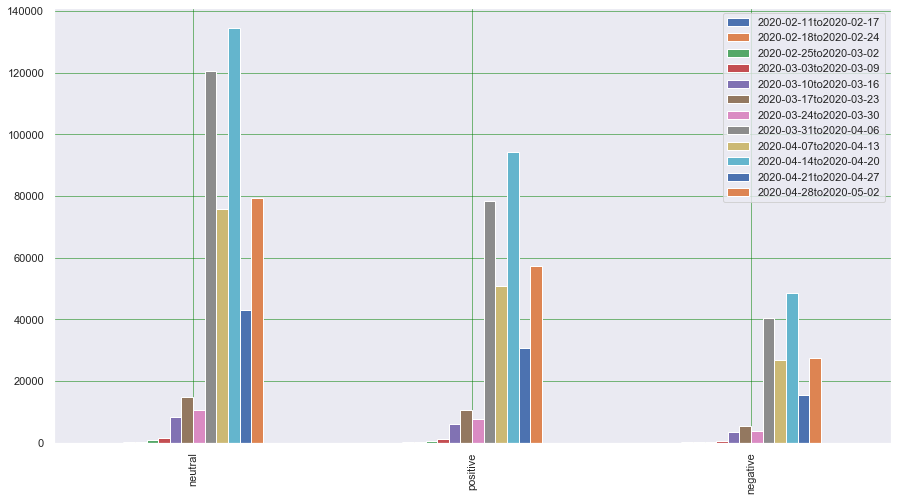

In [190]:
df4.plot(kind='bar',figsize=(15,8))
# Turn on the grid
#plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

# Topic Modelling

In [1]:
import pandas as pd
import operator
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_csv("Sentiment&Cleaned.csv")
cv = TfidfVectorizer(max_features=1000)
# sentences=[]
# for a in df["clean_text"]:
#   sentences.append(a)
X = cv.fit_transform(df["cleaned_tweet"])
#print(cv.get_feature_names())

In [2]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
lsa_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

lsa_topic_matrix =lsa_model.fit_transform(X)

len(lsa_model.components_)

20

In [4]:
terms = cv.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print(" ")

Topic 0: 
thi coronaviru case covid test ha peopl  
Topic 1: 
case death new coronaviru test confirm report  
Topic 2: 
coronaviru via dure pandem youtub updat crisi  
Topic 3: 
test posit coronaviru covid via get antibodi  
Topic 4: 
coronaviru covid thi die corona viru lockdown  
Topic 5: 
covid via youtub death petit sign case  
Topic 6: 
covid dure pandem test help support new  
Topic 7: 
thi case test dure posit new covid  
Topic 8: 
dure death pandem peopl die test toll  
Topic 9: 
ha pandem death trump respons updat wa  
Topic 10: 
death updat health thi april amp respons  
Topic 11: 
updat peopl live april die latest watch  
Topic 12: 
peopl die thi health fight help ha  
Topic 13: 
home ha stay case lockdown safe work  
Topic 14: 
patient health wa pandem new hospit care  
Topic 15: 
pandem case get fight wa confirm trump  
Topic 16: 
pandem home stay new fight death safe  
Topic 17: 
get patient hospit ha updat need treat  
Topic 18: 
wa die help updat patient fight hospit  


# LSA Topic Visualization

In [20]:
from collections import Counter
keys = lsa_topic_matrix.argmax(axis=1).tolist()
count_pairs = sorted(Counter(keys).items())
lsa_categories = [pair[0] for pair in count_pairs]
lsa_counts = [pair[1] for pair in count_pairs]

In [21]:
terms = cv.get_feature_names()
x_lable=[]
for i, comp in enumerate(lsa_model.components_):
    words=[]
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:3]
    for t in sorted_terms:
        words.append(t[0])
    x_lable.append("Topic :"+ str(i)+" "+" ".join(words))


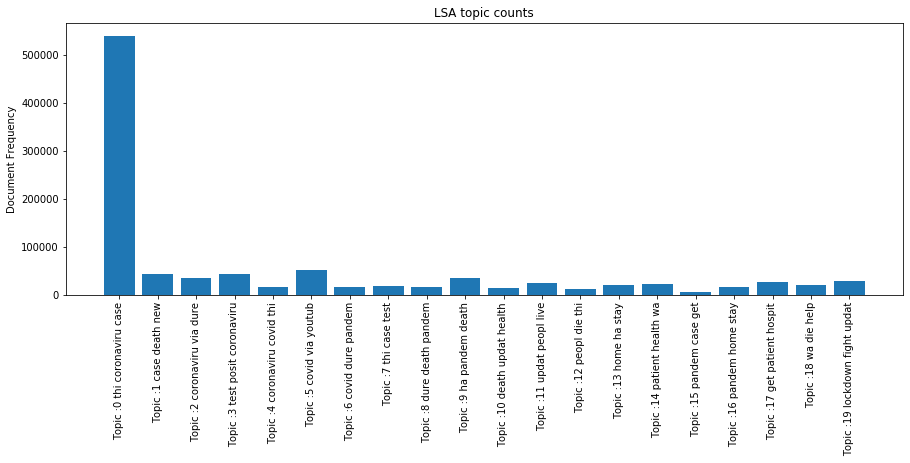

In [27]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(15,5),)
plt.xticks(rotation=90)
ax.bar(x_lable, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_ylabel('Document Frequency');
ax.set_title('LSA topic counts');
plt.show()
